In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [11]:
dataset = pd.read_csv('/Users/shubhamyadav/Documents/D/Machine Learning/ML Algorithms/Datasets/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


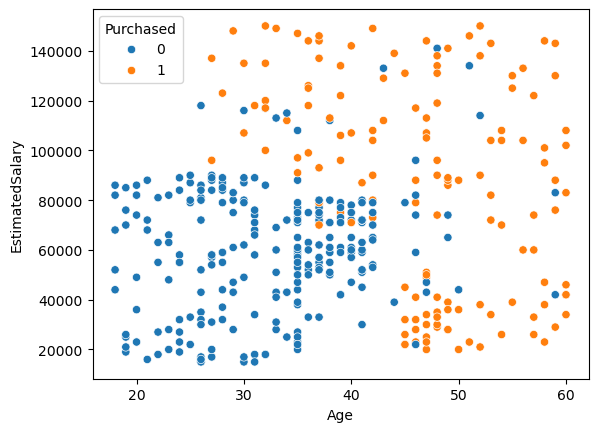

In [54]:
sns.scatterplot(x = "Age", y = "EstimatedSalary", hue = "Purchased", data = dataset)
plt.show()

In [13]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [19]:
x = dataset.loc[:,["Age","EstimatedSalary"]]
y = dataset['Purchased']

<h3>Scaling for features</h3>

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [28]:
sc.fit(x)

StandardScaler()

In [32]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [35]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
dt_hy_max_de = DecisionTreeClassifier(max_depth=5)
dt_hy_max_de.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [66]:
dt.score(x_test,y_test)

0.8375

In [72]:
dt_hy_max_de.score(x_test,y_test)

0.9

<h3>Plotting the Tree </h3>

In [48]:
from sklearn.tree import plot_tree

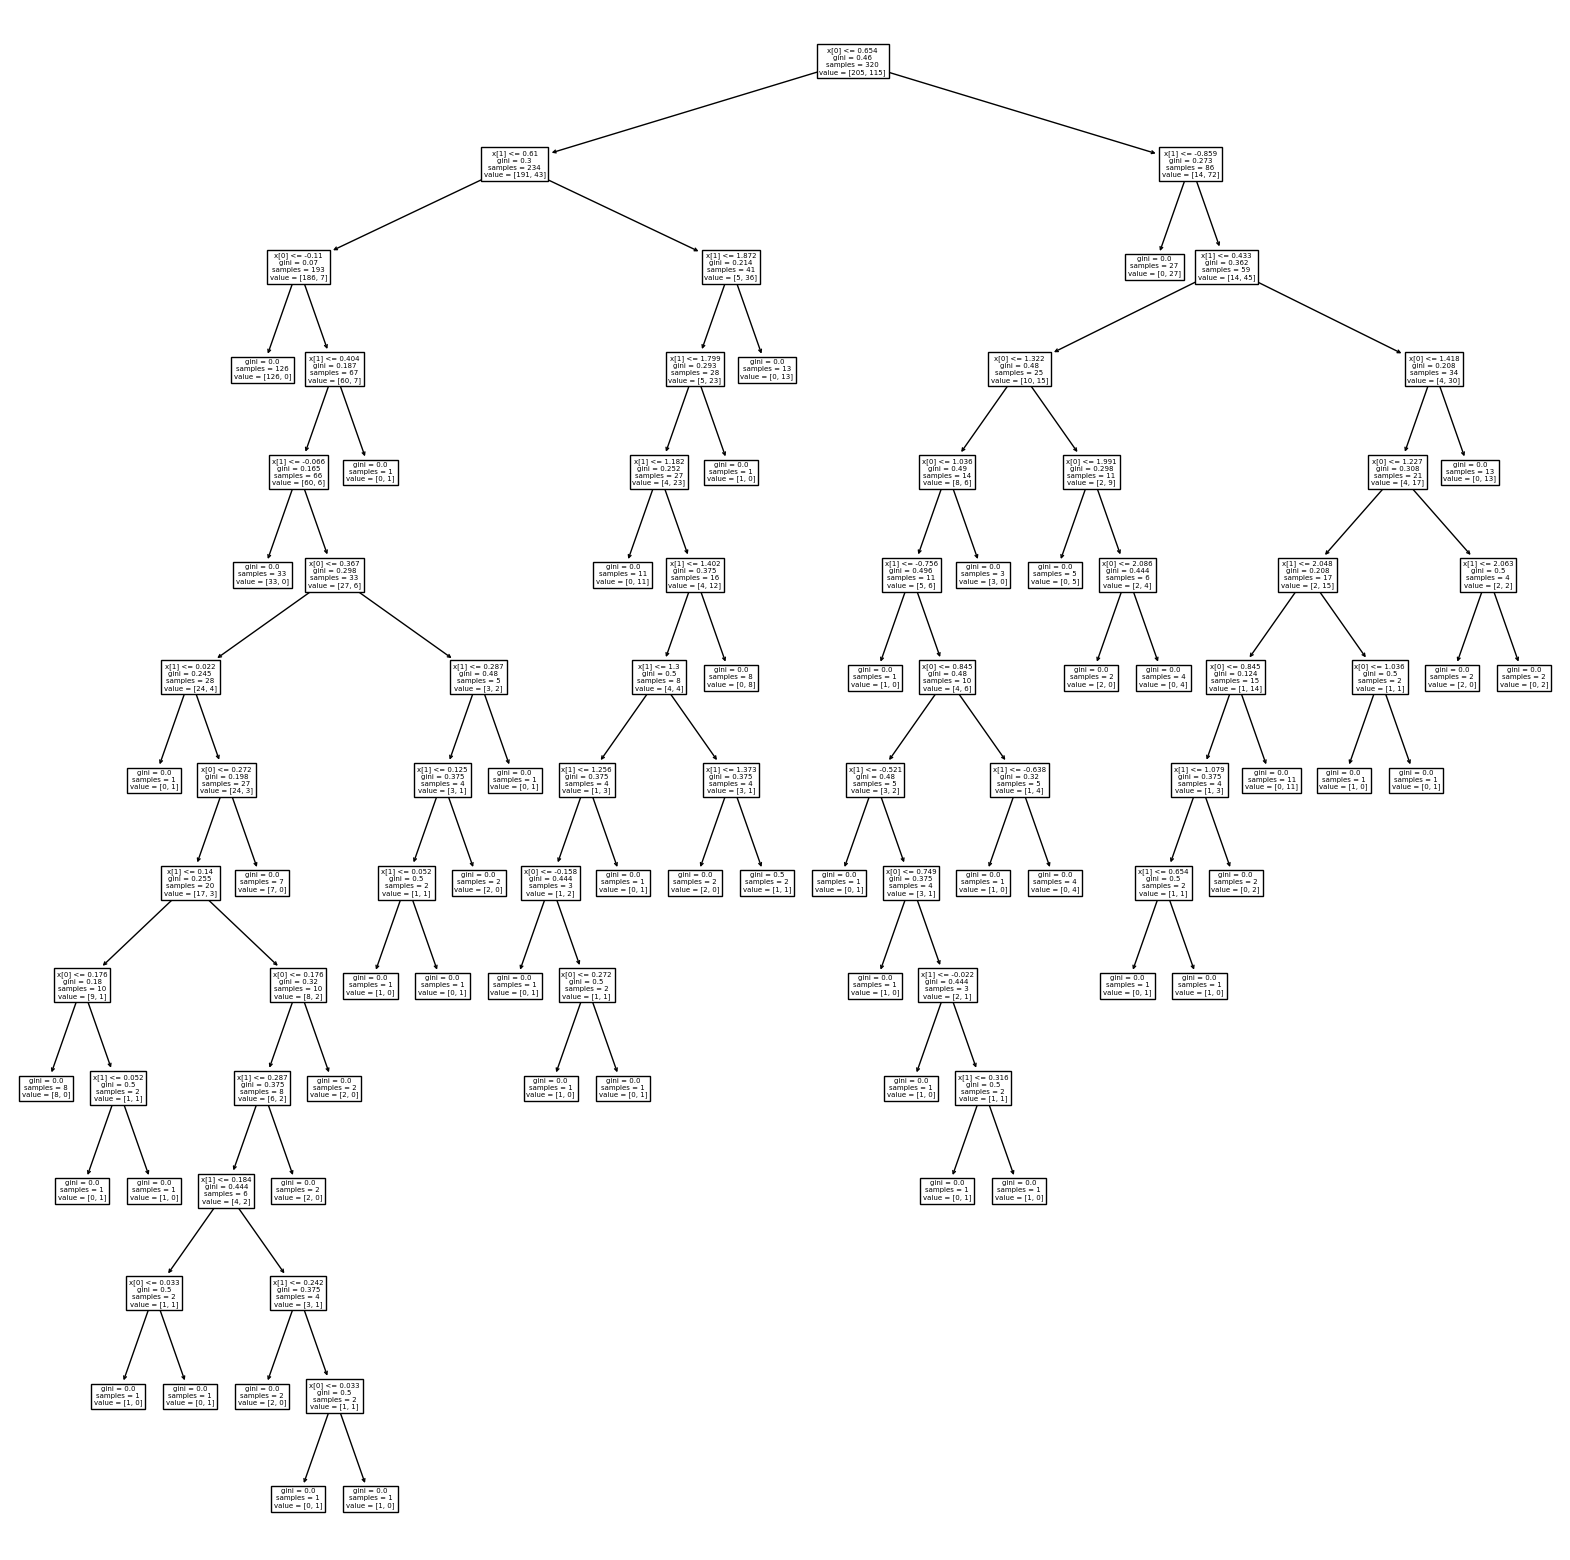

In [52]:
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.savefig("tree.jpg")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


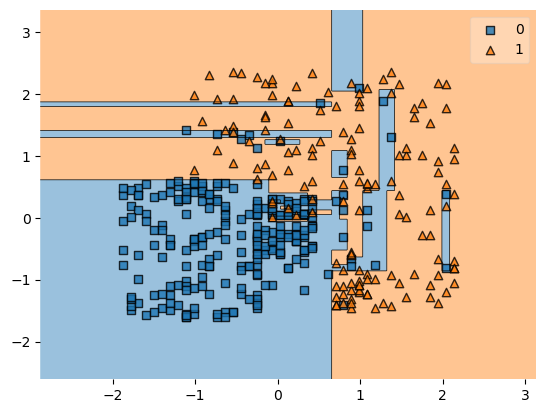

In [60]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

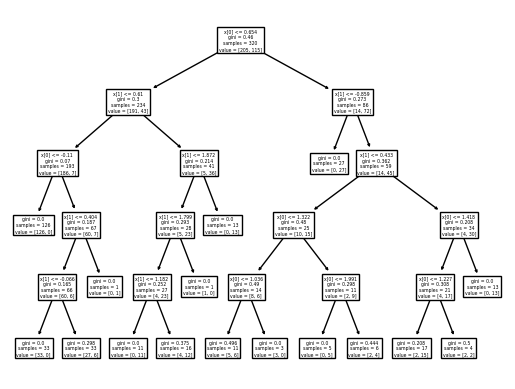

In [76]:
plot_tree(dt_hy_max_de)
plt.show() # plotting tree wiht depth = 5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


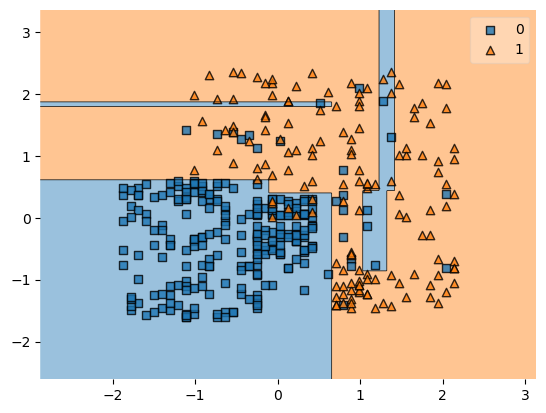

In [78]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = dt_hy_max_de)
plt.show()

<h3>Post Pruning</h3>

In [84]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train, y_train)
    print(dt2.score(x_test,y_test),dt2.score(x_test,y_test),i)

0.9 0.9 1
0.9125 0.9125 2
0.9125 0.9125 3
0.9125 0.9125 4
0.9 0.9 5
0.8625 0.8625 6
0.85 0.85 7
0.85 0.85 8
0.85 0.85 9
0.85 0.85 10
0.8375 0.8375 11
0.8375 0.8375 12
0.8375 0.8375 13
0.8375 0.8375 14
0.8375 0.8375 15
0.8375 0.8375 16
0.8375 0.8375 17
0.8375 0.8375 18
0.8375 0.8375 19
